In [18]:
# Implementation of Ridge Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

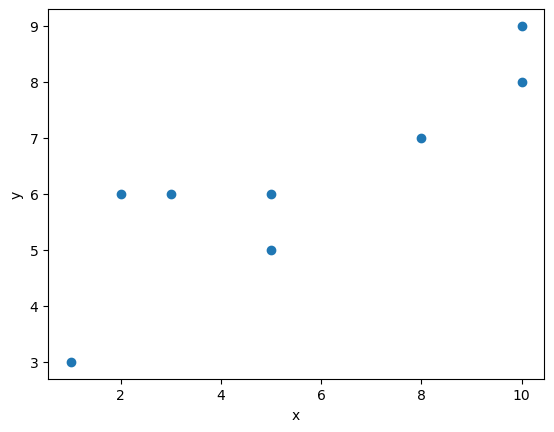

In [19]:
# Create data
x = np.array((1,10,2,5,10,8,5,3)).reshape(-1,1)
y = np.array((3,9,6,6,8,7,5,6)).reshape(-1,1)

# Visualize data
plt.plot(x,y,'o')
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

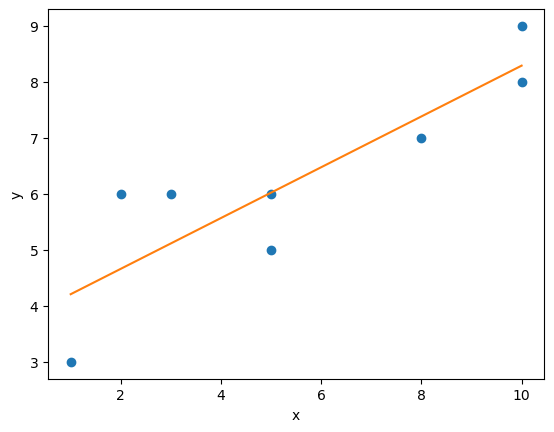

In [20]:
# Try a linear model with one variable
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x, y)
prediction = reg_model.predict(x)

# Visualize data
x_sorted, pred_sorted = zip(*sorted(zip(x, prediction)))
plt.plot(x,y,'o')
plt.plot(x_sorted,pred_sorted)
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

In [21]:
# Create a polinomyal solution
from sklearn.preprocessing import PolynomialFeatures

# Create a model
poly = PolynomialFeatures(3,include_bias=False)
transformed_data = poly.fit_transform(x)

Using a Polynomial of degree 3, we get a equation in the next way:

$$y_{pred} = b_{0} + b_{1}x + b_{2}x^{2} + b_{3}x^{3}$$

In [22]:
# We can visualize the data
transformed_data

array([[   1.,    1.,    1.],
       [  10.,  100., 1000.],
       [   2.,    4.,    8.],
       [   5.,   25.,  125.],
       [  10.,  100., 1000.],
       [   8.,   64.,  512.],
       [   5.,   25.,  125.],
       [   3.,    9.,   27.]])

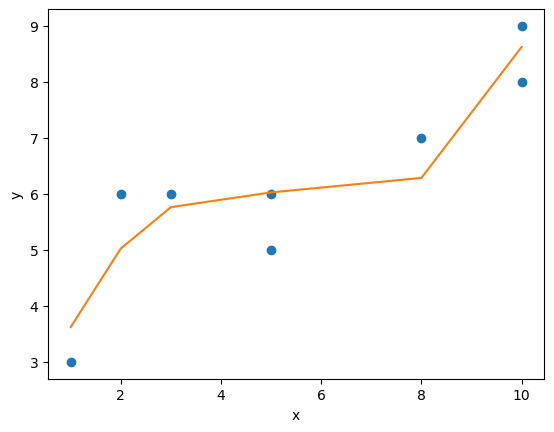

In [23]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(transformed_data, y)
prediction = poly_reg_model.predict(transformed_data)

# Visualize data
x_sorted, pred_sorted = zip(*sorted(zip(x, prediction)))
plt.plot(x,y,'o')
plt.plot(x_sorted,pred_sorted)
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

#### **What is regularization?**

$$RSS_{ridge} = \sum_{i = 1}^{n} (y_{i} - (w_{i}x_{i}+b))^{2} + \alpha\sum_{j=1}^{p} w_{j}^{2}$$

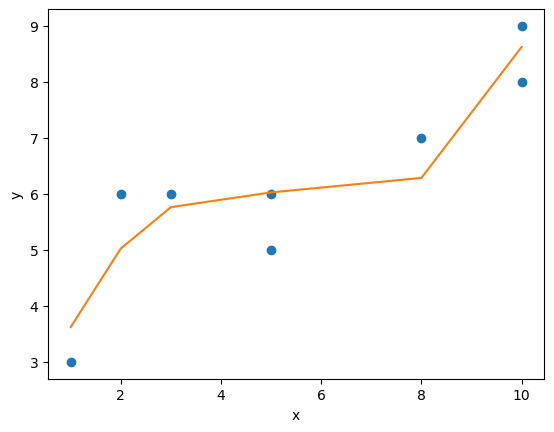

In [28]:
from sklearn.linear_model import Ridge

ridge_model1 = Ridge(alpha=0)
ridge_model1.fit(transformed_data,y)
ridge_pred1 = ridge_model1.predict(transformed_data)

# Visualize data
x_ridge_sorted, pred_ridge_sorted = zip(*sorted(zip(x, ridge_pred1)))
plt.plot(x,y,'o')
plt.plot(x_ridge_sorted,pred_ridge_sorted)
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

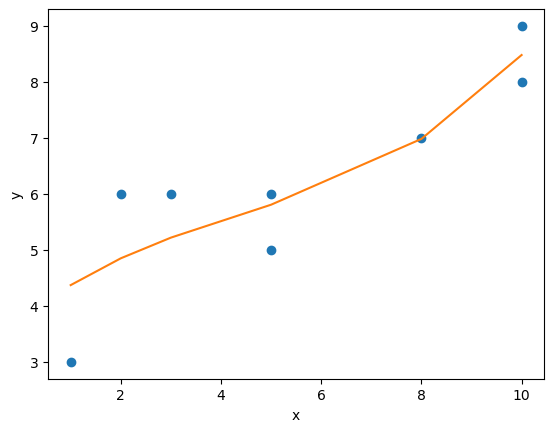

In [25]:
# What is regularization?
from sklearn.linear_model import Ridge

ridge_model2 = Ridge(alpha=1)
ridge_model2.fit(transformed_data,y)
ridge_pred2 = ridge_model2.predict(transformed_data)

# Visualize data
x_ridge_sorted, pred_ridge_sorted = zip(*sorted(zip(x, ridge_pred2)))
plt.plot(x,y,'o')
plt.plot(x_ridge_sorted,pred_ridge_sorted)
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

In [26]:
# We can see the parameter values in each case
print("First ridge model (alpha = 0)",  ridge_model1.coef_)
print("Second ridge model (alpha = 1)",  ridge_model2.coef_)

# You can see how in the second model, the value of the parameters are closer to zero.

First ridge model (alpha = 0) [[ 2.75161225 -0.52498298  0.03224211]]
Second ridge model (alpha = 1) [[ 0.72466826 -0.09932809  0.00742775]]


Try to replicate this same process using `sklearn.linear_model.Lasso` to make a Lasso regression.

$$RSS_{lasso} = \sum_{i = 1}^{n} (y_{i} - (w_{i}x_{i}+b))^{2} + \alpha\sum_{j=1}^{p} |w_{j}|$$